# Importing the libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [12]:
df = pd.read_csv(r"C:\Users\neeha\Downloads\Zomato-20230913T123312Z-001\Zomato\zomato.csv")

In [13]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Understanding the dataset

In [11]:
df.shape

(51717, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [14]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

# Data Cleaning

## Drop unnecessary columns

### i.e, we will work only on important columns - ‘name’, ‘online order’, ‘book_table’, ‘rate’, ‘votes’, ‘rest_type’, ‘cuisines’, ‘approx_cost(for two people)’, ‘listed_in (type)’, and ‘listed_in(city)’

### And we remove 'url', 'address','phone','location','dish_liked','reviews_list','menu_item'

### Because these columns won't contribute to the ratings and reviews.

In [14]:
df.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'], axis = 1, inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   rest_type                    51490 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


## Rename the columns

### As the names of the columns are a bit non descriptive and confusing, it's better to rename these columns

In [16]:
df=df.rename(columns={'name':'Name',
                      'rate':'Ratings',
                      'votes':'Votes',
                      'rest_type':'Rest_Type',
                      'cuisines':'Cuisines',
                      'approx_cost(for two people)':'Cost',
                      'listed_in(type)':'Type',
                      'listed_in(city)':'City',
                      'online_order':'Takes online orders?',
                      'book_table':'Has table booking?'})

In [19]:
df.sample(5)

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
30461,Wedding Biryani,Yes,No,NEW,0,Quick Bites,"Biryani, Kebab",600,Delivery,Koramangala 5th Block
16658,Half & Half Food Box,Yes,No,3.1/5,14,Quick Bites,"North Indian, Chinese, Biryani",500,Delivery,HSR
39408,Feast - Sheraton Grand Bangalore Hotel at Brig...,No,Yes,4.3 /5,950,Fine Dining,"North Indian, Continental","2,000",Buffet,Malleshwaram
24349,The Chef's Kitchen,Yes,No,3.8/5,311,Casual Dining,"Continental, North Indian, Chinese",800,Delivery,Kalyan Nagar
24188,Curries & Chillies,Yes,No,3.3/5,19,"Takeaway, Delivery","Andhra, Biryani, Chinese",300,Delivery,Kalyan Nagar


## Drop duplicate rows

In [17]:
sum(df.duplicated())
df=df.drop_duplicates()

In [18]:
df.shape

(51593, 10)

## Clean individual rows

In [19]:
df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### The Ratings column has  'nan', 'NEW', and '-' values that do not have any ratings.
### And, the values are strings containing '/5'.
### So, convert it into numeric values

In [26]:
#Removing 'nan', 'NEW', and '-' values
df["Ratings"]=df["Ratings"].replace("NEW", np.nan)
df['Ratings']=df['Ratings'].replace('NaN',np.nan)
df['Ratings']=df['Ratings'].replace('-',np.nan)
df['Ratings']=df['Ratings'].replace('nan',np.nan)

In [27]:
#Converting to numeric values
df.Ratings = df.Ratings.astype(str)
df.Ratings = df.Ratings.apply(lambda x: x.replace('/5',''))
df.Ratings = df.Ratings.apply(lambda x: float(x))

In [28]:
df['Ratings']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: Ratings, Length: 51593, dtype: float64

### The Cost column has string values containing commas.
### Convert them to numeric values

In [30]:
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
df['Cost'] = df['Cost'].apply(cost)

In [31]:
df['Cost']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: Cost, Length: 51593, dtype: float64

# Exploratory data analysis

## 1. Restaurants accepting online orders

Takes online orders?
Yes    30347
No     21246
Name: count, dtype: int64


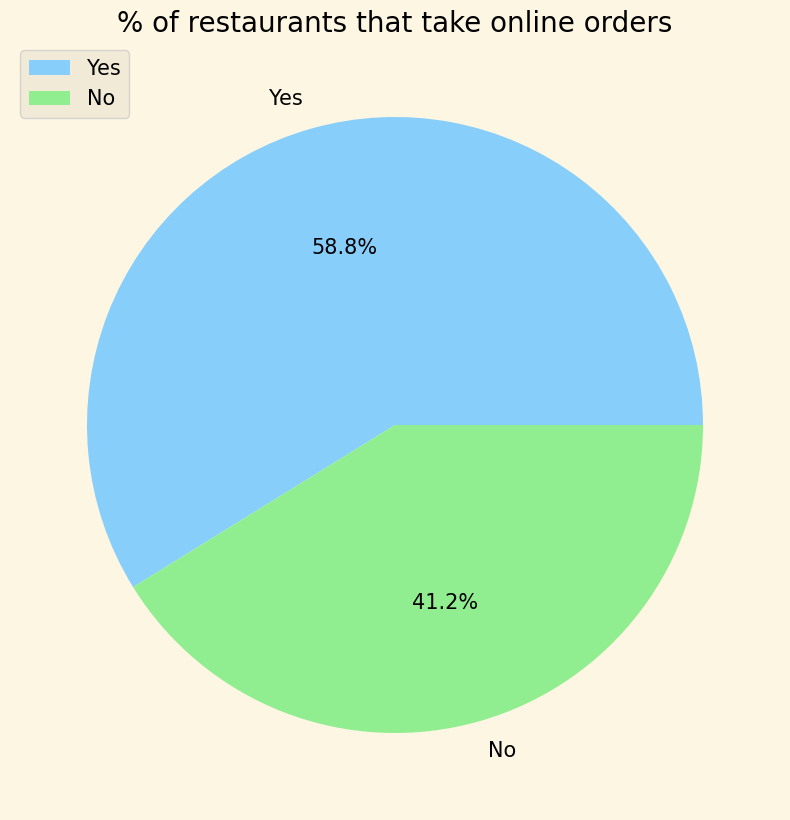

In [45]:
print(df['Takes online orders?'].value_counts())
plt.figure(figsize=(30,10))
df['Takes online orders?'].value_counts().plot(kind='pie',colors 10= ['lightskyblue','lightgreen'],autopct = '%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=10)
plt.ylabel('',size=10)
plt.legend(loc=2, prop={'size': 15})  

### It is seen that approximately 59% of the restaurants provide an online ordering facility.

## 2. Relation between online ordering facility and rating of the restaurant

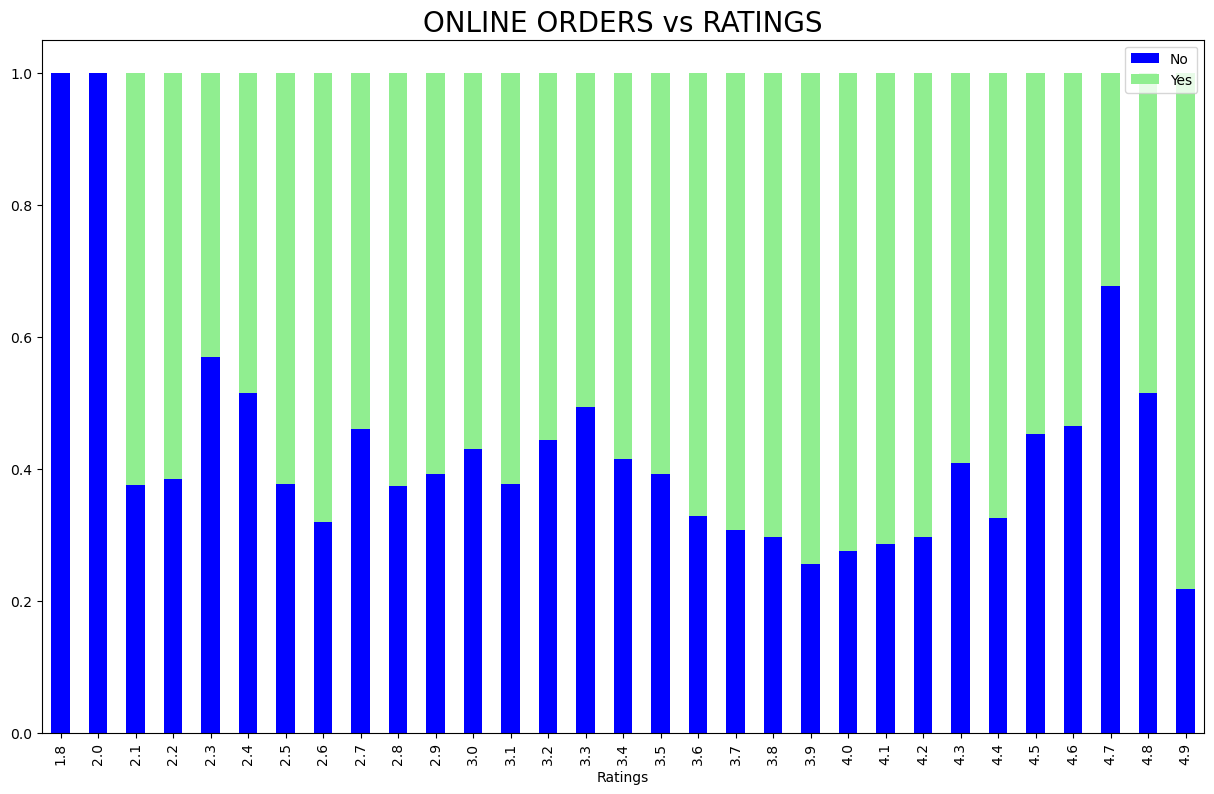

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df['Ratings'], df['Takes online orders?'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['blue','lightgreen'])
plt.title('ONLINE ORDERS vs RATINGS', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

### It is seen that the restaurants receive higher rating if they offer online order facility

## 3. Relation between table booking option and rating of the restaurant

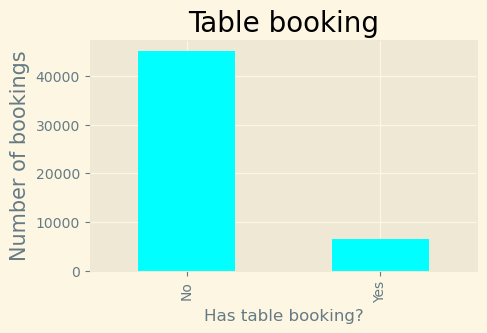

In [63]:
plt.rcParams['figure.figsize'] = (5, 3)
plt.style.use('Solarize_Light2')

df['Has table booking?'].value_counts().plot.bar(color = 'cyan')
plt.title('Table booking', fontsize = 20)
plt.ylabel('Number of bookings', fontsize = 15)
plt.show()

### Most of the restaurants do not provide table booking facility

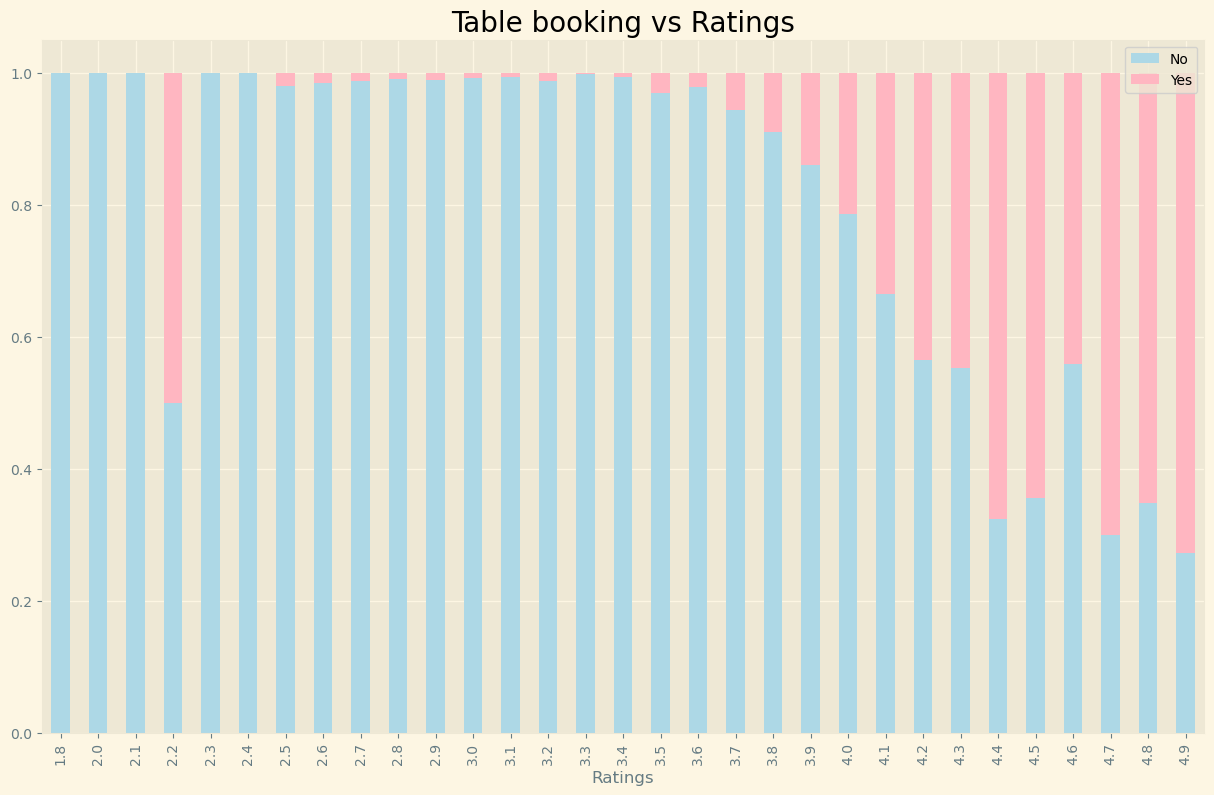

In [35]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df['Ratings'], df['Has table booking?'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['lightblue','lightpink'])
plt.title('Table booking vs Ratings', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

### It is observed that table booking facility is highly available for high rated restaurants (above 4)

# Restaurant ratings are highly dependant on the online-ordering and table-booking facilities.

## Cuisines the customers like the most

In [44]:
cuisines = df.groupby('Cuisines')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(cuisines.head(15))

                                               Cuisines   Ratings
1155  Continental, North Indian, Italian, South Indi...  4.900000
1469                 Healthy Food, Salad, Mediterranean  4.900000
204                         Asian, Chinese, Thai, Momos  4.900000
1141  Continental, North Indian, Chinese, European, ...  4.800000
225             Asian, Mediterranean, North Indian, BBQ  4.800000
2074         North Indian, European, Mediterranean, BBQ  4.800000
1251         European, Mediterranean, North Indian, BBQ  4.789474
53              American, Tex-Mex, Burger, BBQ, Mexican  4.750000
197                                      Asian, Burmese  4.700000
257             BBQ, North Indian, Continental, Chinese  4.700000
2677                     Sushi, Japanese, Chinese, Thai  4.700000
2073              North Indian, European, Mediterranean  4.700000
1521                           Italian, American, Pizza  4.700000
1076         Continental, European, BBQ, Chinese, Asian  4.700000
817   Chin

### Continental, North Indian, and Italian meals, etc are popular among the restaurant customers in Bangalore.

## Correlation between the two people’s approximated cost and a restaurant’s ratings

C:\Users\neeha\AppData\Local\Temp\ipykernel_4512\2916754533.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -1000.0, '-1,000'),
 Text(0, 0.0, '0'),
 Text(0, 1000.0, '1,000'),
 Text(0, 2000.0, '2,000'),
 Text(0, 3000.0, '3,000'),
 Text(0, 4000.0, '4,000'),
 Text(0, 5000.0, '5,000'),
 Text(0, 6000.0, '6,000'),
 Text(0, 7000.0, '7,000')]

<Figure size 3000x1000 with 0 Axes>

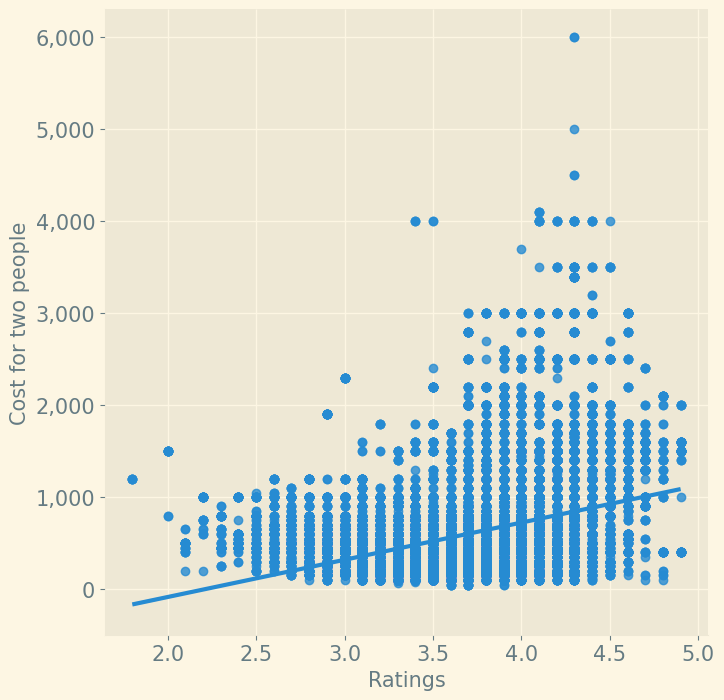

In [48]:
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

### Restaurants that cost less have better reviews than restaurants that are expensive.

## Cities in Bangalore that have a maximum number of high and low-rated restaurants

In [54]:
rest=df.groupby('City')['Ratings'].mean().reset_index().sort_values(by = 'Ratings',ascending = False)
print(a.head())

              City   Ratings
7    Church Street  3.802732
21         MG Road  3.801572
5     Brigade Road  3.800742
27  Residency Road  3.780766
20    Lavelle Road  3.776374


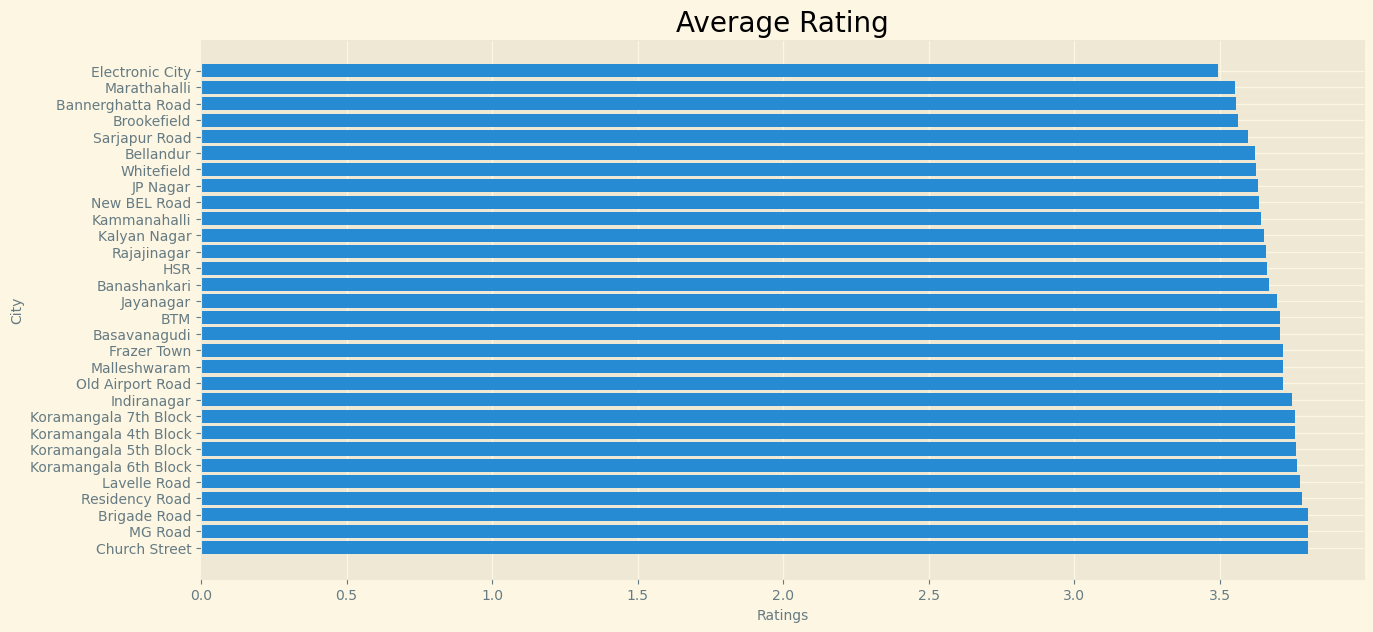

In [62]:
plt.figure(figsize=(15,7))
plt.barh(rest.City,rest.Ratings)
plt.xlabel('Ratings',size=10)
plt.ylabel('City',size=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average Rating',size=20)
plt.show()

### Electronic city has very less high-rated restaurants.
### Church Street, MG Road, Brigade road has many high-rated restaurants.